<a href="https://colab.research.google.com/github/jopachecoc/aprendizaje_automatico1/blob/main/aprendizaje_automatico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**
##Aprendizaje Automático 1
##Examen 3

Solucionado por:

* Morales Torres Julio
* Pacheco Carrillo Jonathan
* Triana Madrid Joshua







 1) Considere el conjunto de datos “Boston Housing Data” presentados en Harrison and Rubinfeld
 (1978). Defina como variable respuesta a la columna MEDV. Realice una partición 80-20, donde
 el primer 80% de los datos son datos de entrenamiento y el restante 20% son datos para prueba.
 Genere los modelos de regresión por regularización Ridge, LASSO y Elastic-Net para los
 datos de entrenamiento. Encuentre los valores óptimos de
y
junto a su respectiva gráfica
 de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección de
 variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada caso.
 Finalmente, realice una predicción con las observaciones de prueba y determine cual de los tres
 modelos es el mejor en capacidad predictiva (RMSE).
 :
$\item  $  

In [3]:
!pip install dfply
!pip install statsmodels
!pip install scikit-learn
!pip install dfply

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from pandas.plotting import scatter_matrix
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split

In [ ]:
# URL de UCI Machine Learning Repository para el Boston Housing Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# Columnas del conjunto de datos de Boston
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
# Cargar el DataFrame con nombres de columnas
df = pd.read_csv(url, delim_whitespace=True, names=column_names)


<ipython-input-3-ee03b91a28b8>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


In [ ]:
# Inicializar el scaler
scaler = StandardScaler()

In [ ]:

# Supongamos que tienes tus datos en variables X (características) y y (etiquetas)
y = df['MEDV']  # Etiquetas correspondientes (labels)
x1 = df['CHAS'] # variable binaria

df2 = df.drop(columns=['CHAS','MEDV']) # Datos de entrada (features)

# Ajustar el scaler a los datos y transformar
Xsc = scaler.fit_transform(df2)
# Convertir el resultado a un DataFrame
X = pd.DataFrame(Xsc, columns=df2.columns)
X=pd.concat([X, x1], axis=1)
## Estandarizamos todas las variables exepto la varible respuesta y la variable chas que es binaria
# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 404
Tamaño del conjunto de prueba: 102


In [ ]:
# Definir una lista de valores alpha para probar
# primer set probado
#alphas = [0.01,0.1,1,10,100,1000,10000,100000]
# segundo set probado
alphas = np.arange(1, 100, 0.01)

#,np.arange(0, 1, 0.01)
# Crear y ajustar el modelo RidgeCV
ridge_cv = RidgeCV(alphas = alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Obtener el mejor valor de alpha
best_alpha_ridge = ridge_cv.alpha_
print(f"Mejor valor de alpha: {best_alpha_ridge}")

# Predecir y calcular el error cuadrático medio (MSE) en los datos de prueba
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE con mejor alpha: {mse_ridge}")
print(f"Los betas para el modelo de ridge son: {ridge_cv.coef_}")
print(f"Los nombres de las variables son: {X_train.columns}")
print(f"el intercepto del modelo de ridge es: {ridge_cv.intercept_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Mejor valor de alpha: 9.000000000000007
MSE con mejor alpha: 24.481951555760535
Los betas para el modelo de ridge son: [-0.91393598  0.5732082   0.12554284 -1.72570965  3.1693159  -0.17709202
 -2.76595021  1.75669026 -1.33092424 -1.92338553  1.1190585  -3.54583051
  2.16642561]
Los nombres de las variables son: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],
      dtype='object')
el intercepto del modelo de ridge es: 22.332277264145205



# Modelo final selecionado de RIDGE
alpha selecionado.
$\alpha=9$

\\

$$\hat{Y_{Ridge}} = 22.33{-0.91}{(CRIM)}+{0.57}{(ZN)}+{0.12}{(INDUS)}-{1.72}{(NOS)}+{3.16}{(RM)}-{0.17}{(AGE)}-{2.76}{(DIS)}+{1.75}{(RAD)}-{1.33}{(TAX)}-{1.92}{(PTRATIO)}+{1.11}{(B)}-{3.54}{(LSTAT)}+{2.16}*{(CHAS)}$$

# Interpretacion de los parametros

Ejemplo de interpretacion de algunos de los parametros
  

*   Nuestro intercepto es 22.33: Suponiendo que en caso de ausencia de cada una de nuestras variables, el valor medio de cada una de las viviendas ocupadas por sus propetarios es de 22 (mil dolares).
*   $\beta_{1}=-0.91$ suponiendo que no existan cambios en alguna de las variables por cada unidad aumentada en (taza de crimen percapita menos su respecttiva media sobre la desviacion) lo cual llamaremos estandarizado, el valor medio por cada una de la vivienda ocupada, disminuye en 0.91 mil dolares.
*   $\beta_{2}=0.57$ indica que por cada aumento en una unidad en la proporcion de terreno residencial zonificado para lotes de más de 25000 pies cuadrados (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.57.
* $\beta_{3}=0.12$ indica que por cada aumento en la proporcion de acres de negocios no minoristas por ciudad (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.12.
* $\beta_{4}=-1.72$ indica que por cada vez que aumente la concentracion de oxido nitricos (partes por 10 millones) (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuira en 1.72.
* $\beta_{5}=3.16$ indica que por cada vez que aumente el numero medio de habitaciones por vivienda,(estandariada) aumentra en una unidad, el valor medio de cada una de las viviendas ocupadas por sus propietarios aumentara en 3.16.
* $\beta_{6}=-0.17$ indica que por cada vez que aumente la proporcion de unidades ocupadas por sus propietarios contruidas antes de 1940 en una unidad (estandarizada), el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuira en 0.17.

.
.
.

* $\beta_{12}=2.16$ indica que por cada vez que el tramo limite con el rio , el valor medio de cada una de las viviendas ocupadas por sus propietarios aumentar en 2.16.



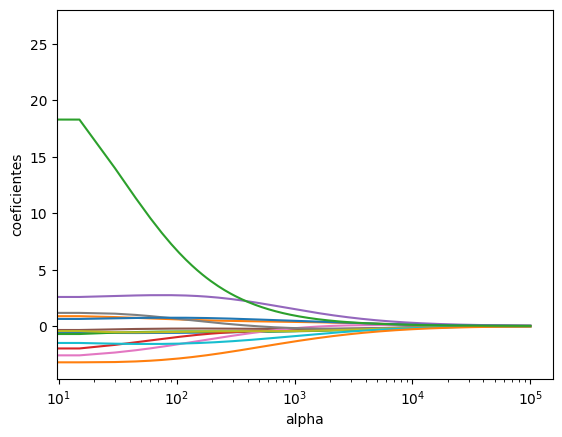

In [ ]:
alphas = np.arange(0, 100000, 15)
coefs = []

for alpha in alphas:
  model_ = Ridge(alpha = alpha, fit_intercept = False)
  model_.fit(X, y)
  coefs.append(model_.coef_.flatten())

plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coeficientes")
plt.show()


# Modelo Lazzo

In [ ]:
#from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV
import pandas as pd
import numpy as np
alphas = np.arange(0, 5, 0.01)

modelo_lasso = LassoCV(alphas = alphas,
                       fit_intercept = True,
                       #normalize = True,
                       cv = 10)

modelo_lasso.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5315.134468601609, tolerance: 4.0699769802197805
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       4.29, 4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39,
       4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 ,
       4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61,
       4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72,
       4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83,
       4.84, 4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94,
       4.95, 4.96, 4.97, 4.98, 4.99]),
        cv=10)

In [ ]:
#alphas = modelo_lasso.alphas
alphas = np.logspace(-9, 2, 100)
coefs = []
n_predictores = []

for alpha in alphas:
  model_ = Lasso(alpha = alpha, fit_intercept = True)
  model_.fit(X, y)
  coefs.append(model_.coef_.flatten())
  n_predictores.append(sum(model_.coef_.flatten() != 0))


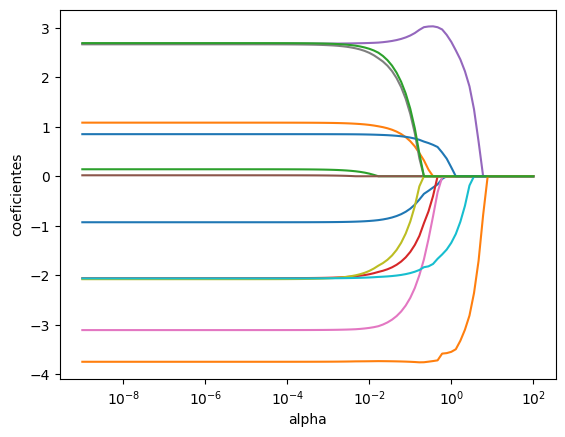

In [ ]:
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coeficientes")
plt.show()

In [ ]:
# Define the Lasso model with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-9, 2, 100), cv=5)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha_la = lasso_cv.alpha_
print(f"Best alpha lasso: {best_alpha_la}")

# Predictions
y_pred_la = lasso_cv.predict(X_test)
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_la)
print(f"Mean Squared Error: {mse_lasso}")
print(f"Los betas para el modelo de lasso son: {lasso_cv.coef_}")
print(f"Los nombres de las variables son: {X_train.columns}")
print(f"el intercepto del modelo de lasso es: {lasso_cv.intercept_}")


Best alpha lasso: 1e-09
Mean Squared Error: 24.291119477980967
Los betas para el modelo de lasso son: [-0.97149423  0.70155561  0.27675211 -1.99143043  3.11571836 -0.1770602
 -3.04577064  2.2827847  -1.79260466 -1.97995351  1.12649863 -3.62814937
  2.78443819]
Los nombres de las variables son: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],
      dtype='object')
el intercepto del modelo de lasso es: 22.292668759481206



# Modelo final selecionado de LASSO
alpha selecionado.
$\alpha=0.000000001$

$$\hat{Y_{LASSO}} = 22.33{-0.97}{(CRIM)}+{0.7}{(ZN)}+{0.27}{(INDUS)}-{1.99}{(NOS)}+{3.11}{(RM)}-{0.17}{(AGE)}-{3.04}{(DIS)}+{2.28}{(RAD)}-{1.79}{(TAX)}-{1.97}{(PTRATIO)}+{1.12}{(B)}-{3.62}{(LSTAT)}+{2.78}*{(CHAS)}$$

# Interpretacion de los parametros

Ejemplo de interpretacion de algunos de los parametros
  

*   Nuestro intercepto es 22.33: Suponiendo que en caso de ausencia de cada una de nuestras variables, el valor medio de cada una de las viviendas ocupadas por sus propetarios es de 22 (mil dolares).
*   $\beta_{1}=-0.97$ suponiendo que no existan cambios en alguna de las variables por cada unidad aumentada en (taza de crimen percapita- su respecttiva media sobre la desviacion) lo cual llamaremos estandarizado, el valor medio por cada una de la vivienda ocupada, disminuye en 0.97 mil dolares.
*   $\beta_{2}=0.7$ indica que por cada aumento en una unidad en la proporcion de terreno residencial zonificado para lotes de más de 25000 pies cuadrados (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.7.
* $\beta_{3}=0.27$ indica que por cada aumento en la proporcion de acres de negocios no minoristas por ciudad (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.27.
* $\beta_{4}=-1.99$ indica que por cada vez que aumente la concentracion de oxido nitricos (partes por 10 millones) (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuira en 1.99.
* $\beta_{5}=3.1$ indica que por cada vez que aumente el numero medio de habitaciones por vivienda,(estandariada) aumentra en una unidad, el valor medio de cada una de las viviendas ocupadas por sus propietarios aumentara en 3.1.
* $\beta_{6}=-0.17$ indica que por cada vez que aumente la proporcion de unidades ocupadas por sus propietarios contruidas antes de 1940 en una unidad (estandarizada), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en -0.17.

.
.
.

* $\beta_{12}=2.16$ indica que por cada vez que el tramo limite con el rio , el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuye en 2.16.

2. El conjunto de datos “YearPredictionMSD” contiene información sobre canciones de música popular y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las características espectrales. El objetivo es predecir el año en que se grabó la canción.

Carque el conjunto de datos usando la función read_csv del paquete pandas y el como
primer argumento el Link, use como segundo argumendo header = None.

In [ ]:
import pandas as pd

url="https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']
df = pd.read_csv(url, names=features,header = None)
print(df.head())

   year        t1        t2        t3        t4        t5        t6        t7  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         t8        t9  ...       t81        t82       t83       t84       t85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

        t86        t87    

Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.

In [ ]:
from sklearn.model_selection import train_test_split

y = df[['year']]
X = df.drop(columns=['year'])

print(X.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

         t1        t2        t3        t4        t5        t6        t7  \
0  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         t8        t9      t10  ...       t81        t82       t83       t84  \
0 -12.23257   7.83089 -2.46783  ...  13.01620  -54.40548  58.99367  15.37344   
1  -0.92019  18.76548  4.59210  ...   5.66812  -19.68073  33.04964  42.87836   
2  -2.35035  16.07017  1.39518  ...   3.03800   26.05866 -50.92779  10.93792   
3 -10.34124   3.55005 -6.36304  ...  34.57337 -171.70734 -16.96705 -46.67617   
4  -9.37636  12.63699  0.93609  ...   9.92661  -55.95724  64.92712 -17.72522   

        t85       t86        t87       t88        t89       t90  
0 

Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con
un coeficiente de penalización de 10, para extraer características importantes del conjunto
de variables explicativas.

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# LASSO con un coeficiente de penalización de 10
lasso = Lasso(alpha=10)

# Ajustar el modelo
lasso.fit(X_train, y_train)

# Mostrar los coeficientes
print("Coeficientes:")
print(lasso.coef_)

# Identificar qué características tienen coeficientes no nulos
important_features = np.where(lasso.coef_ != 0)[0]
print(f"Características seleccionadas (no nulas): {important_features}")

Coeficientes:
[ 1.06222333e-01 -9.38632656e-03 -2.22803488e-02 -0.00000000e+00
 -0.00000000e+00 -1.08183900e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.18808607e-04 -7.48090440e-04  6.94923468e-04
  3.33448441e-04 -1.19342915e-04  1.05320531e-03  3.58714784e-03
 -7.67576258e-04  0.00000000e+00  4.98928670e-03 -0.00000000e+00
  3.57832079e-03 -1.90062803e-04  1.77963631e-03  0.00000000e+00
  0.00000000e+00 -4.77164741e-06 -2.85521455e-03 -0.00000000e+00
 -1.26185954e-03  0.00000000e+00 -0.00000000e+00 -2.75012340e-03
 -3.65191474e-04  7.37918915e-04  1.26117100e-03 -2.16171944e-03
 -4.91446038e-03 -0.00000000e+00 -8.23291437e-04 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.76363614e-04 -1.72130827e-03
 -0.00000000e+00  2.96505354e-05  0.00000000e+00 -1.34194892e-05
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.95509145e-03  1.33419298e-03 -2.81259654e-03 -2.87032783e-03
 -0.0000000

Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su significancia y su R2 adj .

In [ ]:
import statsmodels.api as sm

# Seleccionar solo los x obtenidos por lasso
X_train_selected = X_train.iloc[:, important_features]

# Agregar una constante
X_train_selected = sm.add_constant(X_train_selected)

# Ajustar el modelo OLS
ols_model = sm.OLS(y_train, X_train_selected).fit()

# Ver el resumen del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2307.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:14:28   Log-Likelihood:            -1.5194e+06
No. Observations:              412276   AIC:                         3.039e+06
Df Residuals:                  412224   BIC:                         3.040e+06
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.3710      0.199   9799.208      0.0

Interpretación de significancia y R2:

* R² = 0.222: El modelo explica el 22.2% de la variabilidad en los años de grabación, lo cual es bajo.
* F-statistic = 2307 y Prob (F-statistic) = 0.00: El valor de la estadística F es muy alto y su p-valor es extremadamente bajo (prácticamente 0), esto sugiere que al menos una de las variables independientes tiene una relación significativa con el año de grabación

Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.

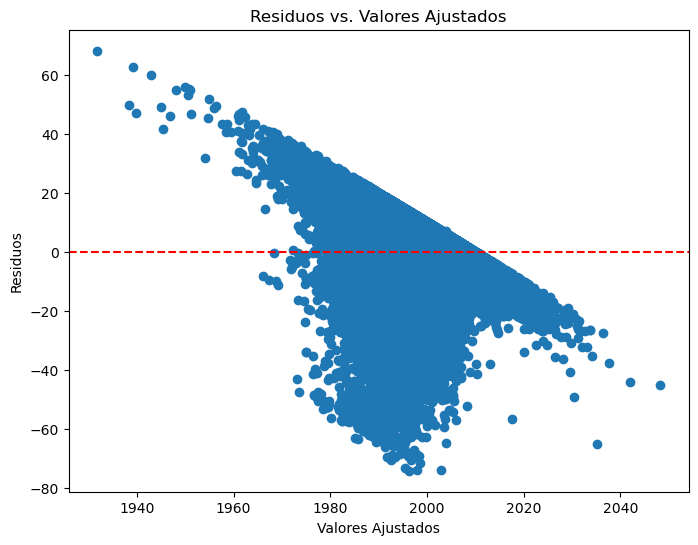

In [ ]:
import matplotlib.pyplot as plt

# Obtener residuos y valores ajustados
residuals = ols_model.resid
fitted_values = ols_model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

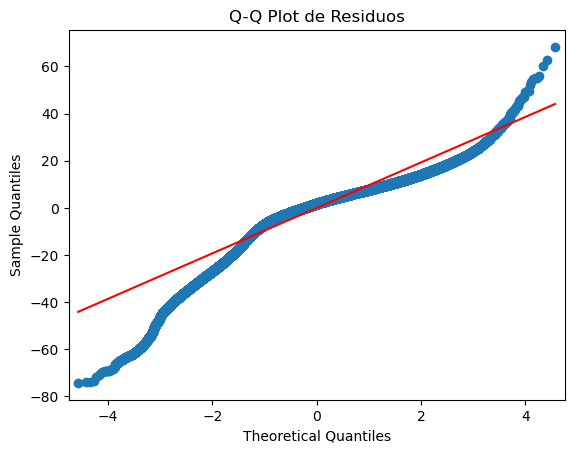

In [ ]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot de Residuos')
plt.show()

Supuestos de los errores:

* autocorrelación: en la tabla anterior como el valor de Durbin es cercado a 2 indicando que no hay autocorrelación
* supuesto de linealidad, se ve en el gráfico un comportamiento con un patrón , concluimos no linealidad en los datos
* Homocedasticidad, se ve que no existe homocedasticidad, tiene un comportamiento Heterocedástico, a medida que crece la variabilidad crece también o quizá pueden ser algunos valores atípicos.
* Normalidad de los errores: los puntos no se ajustan a una línea recta indicando no normalidad en sus errores.

CONCLUSIÓN FINAL:

* Los valores explicados R², F-statistic y Prob (F-statistic) sugieren poca relevancia en la predicción y en la significancia de las variables
* Basado en los supuestos de los errores este modelo no presenta las propiedades ni la linealidad sugerida por la literatura para ser considerado un modelo deseable
* Por lo tanto la conclusión final es que este modelo no es el adecuado para para predecir el año de grabación de la canción

# REGRESION ELASTIC NET


In [ ]:
#primer ratio probado
l1_ratios = np.linspace(0, 1, 10)#[0.982, 0.984, 0.985, 0.986, 0.987]

modelo_elasticnet = ElasticNetCV(
    l1_ratio = l1_ratios,
    alphas = np.logspace(-9, 2, 100),
    #np.logspace(-10, 2, 200),
    fit_intercept = True,
    cv = 10)

#modelo_elasticnet.fit(X, y)
# Fit the model
modelo_elasticnet.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15797.443304511235, tolerance: 3.239898666666667
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did

ElasticNetCV(alphas=array([1.00000000e-09, 1.29154967e-09, 1.66810054e-09, 2.15443469e-09,
       2.78255940e-09, 3.59381366e-09, 4.64158883e-09, 5.99484250e-09,
       7.74263683e-09, 1.00000000e-08, 1.29154967e-08, 1.66810054e-08,
       2.15443469e-08, 2.78255940e-08, 3.59381366e-08, 4.64158883e-08,
       5.99484250e-08, 7.74263683e-08, 1.00000000e-07, 1.29154967e-07,
       1.66810054e-07, 2.154434...
       2.15443469e+00, 2.78255940e+00, 3.59381366e+00, 4.64158883e+00,
       5.99484250e+00, 7.74263683e+00, 1.00000000e+01, 1.29154967e+01,
       1.66810054e+01, 2.15443469e+01, 2.78255940e+01, 3.59381366e+01,
       4.64158883e+01, 5.99484250e+01, 7.74263683e+01, 1.00000000e+02]),
             cv=10,
             l1_ratio=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]))

In [ ]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Text(0, 0.5, 'MSE')

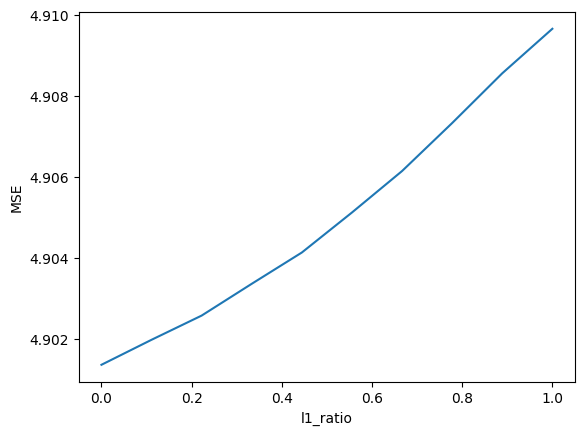

In [ ]:
mean_errors = np.sqrt(modelo_elasticnet.mse_path_.mean(axis = 2))

plt.plot(l1_ratios, mean_errors.min(axis = 1))
plt.xlabel("l1_ratio")
plt.ylabel("MSE")

In [ ]:
# Best parameters
best_alpha = modelo_elasticnet.alpha_
best_l1_ratio = modelo_elasticnet.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}") # si el L1 ratio es cero correspopnde a un modelo ridge

# Predictions
y_pred = modelo_elasticnet.predict(X_test)

# Evaluate the model
mse_elas = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_elas}")
print(f"Los betas para el modelo de elastic son: {modelo_elasticnet.coef_}")
print(f"Los nombres de las variables son: {X_train.columns}")
print(f"el intercepto del modelo de lasso es: {modelo_elasticnet.intercept_}")



Best alpha: 0.021544346900318822
Best l1_ratio: 0.0
Mean Squared Error: 24.47570128532892
Mean Squared Error: 24.47570128532892
Los betas para el modelo de elastic son: [-0.91552416  0.57658997  0.12943375 -1.73318556  3.16813868 -0.17713354
 -2.77416688  1.77010935 -1.34212586 -1.92509473  1.11940258 -3.54851907
  2.18196916]
Los nombres de las variables son: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],
      dtype='object')
el intercepto del modelo de lasso es: 22.33127352689817





# Modelo final selecionado de ELASTICNET
alpha selecionado.
$\alpha=0.021$


best ratio=0
Como es cero el best ratio indica que el mejor modelo es uno completamente ridge


$$\hat{Y_{ELASTICNET}} = 22.33{-0.91}{(CRIM)}+{0.57}{(ZN)}+{0.12}{(INDUS)}-{1.73}{(NOS)}+{3.16}{(RM)}-{0.17}{(AGE)}-{2.77}{(DIS)}+{1.77}{(RAD)}-{1.34}{(TAX)}-{1.92}{(PTRATIO)}+{1.11}{(B)}-{3.54}{(LSTAT)}+{2.18}*{(CHAS)}$$

# Interpretacion de los parametros

Ejemplo de interpretacion de algunos de los parametros
  

*   Nuestro intercepto es 22.33: Suponiendo que en caso de ausencia de cada una de nuestras variables, el valor medio de cada una de las viviendas ocupadas por sus propetarios es de 22 (mil dolares).
*   $\beta_{1}=-0.91$ suponiendo que no existan cambios en alguna de las variables por cada unidad aumentada en (taza de crimen percapita- su respecttiva media sobre la desviacion) lo cual llamaremos estandarizado, el valor medio por cada una de la vivienda ocupada, disminuye en 0.91 mil dolares.
*   $\beta_{2}=0.57$ indica que por cada aumento en una unidad en la proporcion de terreno residencial zonificado para lotes de más de 25000 pies cuadrados (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.57.
* $\beta_{3}=0.12$ indica que por cada aumento en la proporcion de acres de negocios no minoristas por ciudad (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 0.12.
* $\beta_{4}=-1.73$ indica que por cada vez que aumente la concentracion de oxido nitricos (partes por 10 millones) (estandarizado), el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuira en 1.73.
* $\beta_{5}=3.1$ indica que por cada vez que aumente el numero medio de habitaciones por vivienda,(estandariada) aumentra en una unidad, el valor medio de cada una de las viviendas ocupadas por sus propietarios aumentara en 3.1.
* $\beta_{6}=-0.17$ indica que por cada vez que aumente la proporcion de unidades ocupadas por sus propietarios contruidas antes de 1940 en una unidad (estandarizada), el valor medio de cada una de las viviendas ocupadas por sus propietarios disminuira en -0.17.

.
.
.

* $\beta_{12}=2.18$ indica que por cada vez que el tramo limite con el rio , el valor medio de cada una de las viviendas ocupadas por sus propietarios aumenta en 2.18.

4.947923964225859

# Determinar cual de los 3 modelos es el mejor en capacidad predictiva (RMSE)
Vemos que los modelos seleccionados  (LASSO, RIDGE Y ELASTICNET) se quedan con las 13 variables selecionados en la data, el modelo lazzo no descarta niguna de estas al momento de arrojar su mejor prediccion.
Ahora haremos unos calculos para saber cual de los tres es el mejor segun RSME.

segun los resultados que se muestran a continuacion el mejor modelo al realizar la prediccion sobre la base de test segun su RSME en test es el "lasso" con un valor de alpha de=0.000000001 y con todas sus variables.
sin embargo los coeficientes de los 3 modelos se parecen bastante junto con sus respectivos valores de MSE.


In [ ]:
print(f"Mean Squared Error: {np.sqrt(mse_ridge)}")
print(f"Mean Squared Error: {np.sqrt(mse_lasso)}")
print(f"Mean Squared Error: {np.sqrt(mse_elas)}")


Mean Squared Error: 4.947923964225859
Mean Squared Error: 4.928602182970438
Mean Squared Error: 4.947292318564664


#3. El conjunto de datos conocido como “California Housing Dataset” puede ser cargado del paquete sklearn. La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).
#Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

a. Lea el conjunto de datos usando la función fetch_california_housing del paquete sklearn.datasets, guardelos en una variable llamada california_housing y con el comando print(california_housing.DESCR) observe la descripción general del dataset y en especial qué es cada una de las variables de entrada

In [1]:
# Importamos librerias requeridas junto con el dataset de trabajo
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos California Housing Dataset
california_housing = fetch_california_housing()

# Mostrar la descripción general del dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

b. Separe las variables explicativas X de la variable respuesta Y, para acceder a ellas use los comandos california_housing.data y california_housing.target. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto.

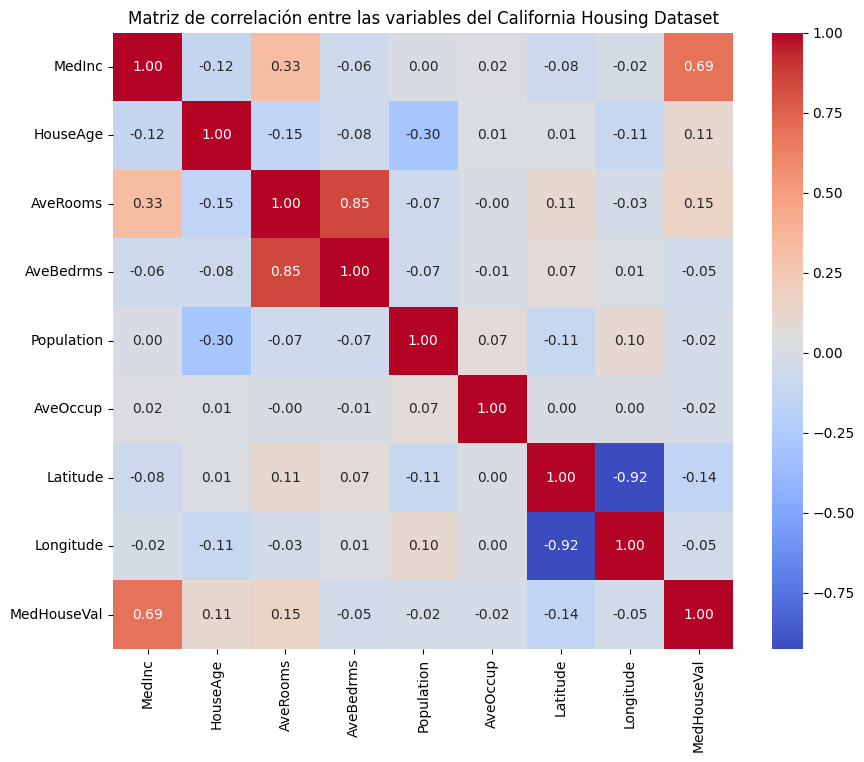

In [3]:
# Separar las variables explicativas (X) y la variable respuesta (Y)
X = california_housing.data
y = california_housing.target

# Crear un DataFrame con las variables explicativas
df_X = pd.DataFrame(X, columns=california_housing.feature_names)

# Añadir la variable respuesta al DataFrame
df_X['MedHouseVal'] = y

# Calcular la matriz de correlación
correlation_matrix = df_X.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre las variables del California Housing Dataset")
plt.show()

De acuerdo con la matriz de correlación del conjunto de datos California Housing, podemos observar:

1. La correlación entre **MedInc** (Ingreso Medio) y **MedHouseVal** (Valor Medio de la Vivienda) es de 0.69, lo que indica una fuerte correlación positiva, donde a mayores ingresos existe mayor valor promedio de la vivienda.
2. Existe una correlación positiva de 0.85 entre **AveRooms** (Promedio de Habitaciones) y **AveBedrms** (Promedio de Dormitorios), indicando multicolinealidad entre estas dos variables, al estar altamente relacionadas, exitiendo la necesidad de eliminar una de estas variables.
3. La correlación entre **Latitude** y **Longitude** es de -0.92, con una fuerte correlación negativa y reflejan la geografía de California, las ubicaciones al norte tienen una longitud menor y viceversa. Por lo tanto estas dos variables deben analizarse conjuntamente.
4. No se observan otras correlaciones relevantes entre las variables. La mayoría de las otras correlaciones son cercanas a cero, podemos inferir que la relación lineal baja o nula.

c. Ajuste un modelo de regresión Elastic-Net con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas.

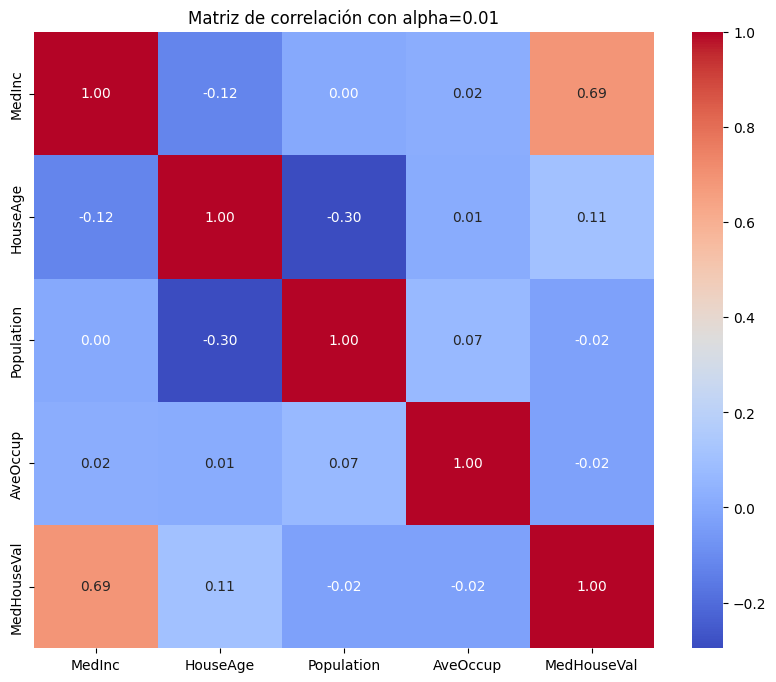

No se encontraron mas correlaciones altas.


In [4]:
from sklearn.linear_model import ElasticNet
import numpy as np

# Parámetros iniciales
alpha = 0.01  # Coeficiente de penalización inicial (ajustarlo iterativamente)
tol = 1e-3    # Tolerancia para el ajuste del modelo

# Iterar hasta que no haya multicolinealidad
while True:
    # Ajustar el modelo Elastic-Net
    model = ElasticNet(alpha=alpha, l1_ratio=0.5, tol=tol, max_iter=10000)
    model.fit(df_X, y)

    # Obtener los coeficientes y filtrar las variables relevantes
    coef = model.coef_
    selected_features = df_X.columns[coef != 0]
    df_selected = df_X[selected_features]

    # Calcular la matriz de correlación de las variables seleccionadas
    correlation_matrix = df_selected.corr()

    # Visualizar la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Matriz de correlación con alpha={alpha}")
    plt.show()

    # Verificar si hay correlaciones altas (definido aquí como > 0.8)
    high_corr = np.any(np.abs(correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)]) > 0.8)

    # Detener el proceso si no hay correlaciones altas
    if not high_corr:
        print("No se encontraron mas correlaciones altas.")
        break

    # Incrementar ligeramente el coeficiente de penalización para eliminar más variables
    alpha += 0.01

 # 4. El fichero de datos “Dengue_Data.xlsx” contiene información epidemiológica de los casos de Dengue en el Departamento de Antioquia. Estos datos contienen tanto información socio-económica como clínica de las personas que resultaron infectadas y desarrollaron Dengue o Dengue Hemorrágico. Para una completa descripción de los datos y/o fenómeno estudiado, remítase al siguiente artículo Identification of Hazard and Socio-Demographic Patterns of Dengue Infections in a Colombian Subtropical Region from 2015 to 2020: Cox Regression Models and Statistical Analysis. Realizar.

In [8]:
file_path = "Dengue_Data.xlsx"
df = pd.read_excel(file_path, sheet_name='datos_2')
df['nom_eve'] = df['nom_eve'].map({'DENGUE': 0, 'DENGUE GRAVE': 1})

In [9]:
df.columns
#X.head()
#X['ocupacion_'].value_counts()
#X['gp_migrant'].value_counts()

Index(['edad_', 'Grupos edad', 'sexo_', 'area_', 'area_.1', 'area_.2',
       'ocupacion_', 'per_etn_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'gp_indigen', 'gp_pobicbf', 'gp_mad_com',
       'gp_desmovi', 'gp_vic_vio', 'gp_otros', 'fec_con_', 'ini_sin_',
       'tpo_consulta(consulta-inicio)', 'pac_hos_', 'fec_hos_',
       'tpo_deterioro(hosp-consul)', 'fiebre', 'cefalea', 'dolrretroo',
       'malgias', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito', 'diarrea',
       'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia',
       'caida_plaq', 'acum_liqui', 'aum_hemato', 'extravasac', 'hemorr_hem',
       'choque', 'daño_organ', 'nom_eve', 'Region'],
      dtype='object')

In [42]:
y = df['nom_eve']
X = df.drop(columns=['nom_eve'])
X = X[['edad_', 'Grupos edad', 'sexo_', 'area_.2','ocupacion_', 'per_etn_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela','gp_gestan', 'gp_indigen', 'gp_pobicbf', 'gp_mad_com','gp_desmovi', 'gp_vic_vio', 'gp_otros']]
# dejamos el area 2 ya que es como la mas completa informacion de esta
# estas variables no se a que se refiere asi que no las tendremos en cuenta puede sesgar el modelo 'fec_con_', 'ini_sin_', 'fec_hos_'
# tpo_consulta(consulta-inicio) y tpo_deterioro(hosp-consul) no se a que corresponde y tiene muchon niveles o valores no la tendre en cuenta
# fiebre no lo tendremos en cuenta ya que todos toman en mismo valor

# Convertir 'embarked' a variables numéricas (p.ej. One-Hot Encoding)
X = pd.get_dummies(X, columns=['Grupos edad','sexo_','area_.2','ocupacion_','per_etn_','gp_discapa','gp_desplaz','gp_migrant',
                      'gp_carcela','gp_gestan', 'gp_indigen', 'gp_pobicbf', 'gp_mad_com','gp_desmovi', 'gp_vic_vio', 'gp_otros'], drop_first=True)


# Convertir el resultado a un DataFrame

## Estandarizamos todas las variables exepto la varible respuesta y la variable chas que es binaria
# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 40317
Tamaño del conjunto de prueba: 10080


In [11]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
#import seaborn as sns
#dff = sns.load_dataset('titanic')
#type((dff)
X.head()


,edad_,Grupos edad_Adultez,Grupos edad_Infancia,Grupos edad_Juventud,Grupos edad_Primera infancia,Grupos edad_Vejez,sexo__M,area_.2_Centro Poblado,area_.2_Rural Disperso,ocupacion__Directores y gerentes,...,gp_desplaz_Sí,gp_migrant_Sí,gp_carcela_Sí,gp_gestan_Sí,gp_indigen_Sí,gp_pobicbf_Sí,gp_mad_com_Sí,gp_desmovi_Sí,gp_vic_vio_Sí,gp_otros_Sí
0,4,False,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,27,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,46,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,35,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,11,False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True


LogisticRegression()

# Modelo logit

In [43]:
# Crear el modelo Logístico
logit_model = LogisticRegression()
# Ajustar el modelo
logit_model.fit(X_train, y_train)

LogisticRegression()

In [72]:
lasso_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "l1", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
lasso_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     penalty='l1', random_state=47, solver='saga')

In [73]:
ridge_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "l2", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
ridge_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     random_state=47, solver='saga')

In [74]:
elastic_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "elasticnet", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
elastic_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     penalty='elasticnet', random_state=47, solver='saga')

In [75]:
# Predictions 

y_pred = logit_model.predict(X_test)
print("Precisión del modelo: logi", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = lasso_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = ridge_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = elastic_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: logi 0.9995039682539683
[[10016     0]
 [    5    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10016
           1       1.00      0.92      0.96        64

    accuracy                           1.00     10080
   macro avg       1.00      0.96      0.98     10080
weighted avg       1.00      1.00      1.00     10080

Precisión del modelo: lasso 0.9932539682539683
[[10012     4]
 [   64     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10016
           1       0.00      0.00      0.00        64

    accuracy                           0.99     10080
   macro avg       0.50      0.50      0.50     10080
weighted avg       0.99      0.99      0.99     10080

Precisión del modelo: lasso 0.9932539682539683
[[10012     4]
 [   64     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10016
    

In [67]:
y = df['nom_eve']
X = df.drop(columns=['nom_eve'])
X = X[['tpo_consulta(consulta-inicio)','pac_hos_','tpo_deterioro(hosp-consul)','fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito',
    'diarrea', 'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia', 'caida_plaq',
    'acum_liqui', 'aum_hemato', 'extravasac', 'hemorr_hem', 'choque', 'daño_organ']].fillna(False)	

In [68]:
X.head()

,tpo_consulta(consulta-inicio),pac_hos_,tpo_deterioro(hosp-consul),fiebre,cefalea,dolrretroo,malgias,artralgia,erupcionr,dolor_abdo,...,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ
0,1.0,No,False,Sí,Sí,No,Sí,Sí,Sí,No,...,No,False,False,False,False,False,False,False,No,False
1,1.0,No,False,Sí,Sí,Sí,Sí,Sí,Sí,No,...,No,False,False,False,False,False,False,False,No,False
2,2.0,No,False,Sí,Sí,No,Sí,No,No,No,...,No,False,False,False,False,False,False,False,No,False
3,1.0,No,False,Sí,No,No,Sí,Sí,No,No,...,No,No,No,No,No,No,False,False,No,False
4,2.0,No,False,Sí,No,No,Sí,No,Sí,No,...,No,False,False,False,False,False,False,False,No,False


In [69]:
X = X.applymap(lambda x: True if x == 'Sí' else (False if x == 'No' else x))
X.head()

C:\Users\joshu\AppData\Local\Temp\ipykernel_14420\3193156063.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: True if x == 'Sí' else (False if x == 'No' else x))


,tpo_consulta(consulta-inicio),pac_hos_,tpo_deterioro(hosp-consul),fiebre,cefalea,dolrretroo,malgias,artralgia,erupcionr,dolor_abdo,...,hepatomeg,hem_mucosa,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ
0,1.0,False,False,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,False,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,False,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 40317
Tamaño del conjunto de prueba: 10080


In [71]:
# Crear el modelo Logístico
logit_model = LogisticRegression()
# Ajustar el modelo
logit_model.fit(X_train, y_train)

LogisticRegression()

In [76]:
lasso_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "l1", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
lasso_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     penalty='l1', random_state=47, solver='saga')

In [77]:
ridge_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "l2", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
ridge_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     random_state=47, solver='saga')

In [78]:
elastic_model_socio = LogisticRegressionCV(random_state = 47,
                                    penalty = "elasticnet", ## Elgir como penalizar: l1, l2, elasticnet, None
                                    solver = "saga", ### Algoritmo de optimización, mirar tabla de la
                                                      ### documentación para saber cual elegir.
                                    Cs = [0.5, 1.0],  ### parametro de penalización, valores menores a uno penalizacion alta
                                              ### valores mayores a 1 penalizaciones bajas
                                    l1_ratios = [0.2, 0.8, 0.97],
                                    cv = 10)
elastic_model_socio.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegressionCV(Cs=[0.5, 1.0], cv=10, l1_ratios=[0.2, 0.8, 0.97],
                     penalty='elasticnet', random_state=47, solver='saga')

In [79]:
# Predictions 

y_pred = logit_model.predict(X_test)
print("Precisión del modelo: logi", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = lasso_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = ridge_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = elastic_model_socio.predict(X_test)
print("Precisión del modelo: lasso", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: logi 0.9995039682539683
[[10016     0]
 [    5    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10016
           1       1.00      0.92      0.96        64

    accuracy                           1.00     10080
   macro avg       1.00      0.96      0.98     10080
weighted avg       1.00      1.00      1.00     10080

Precisión del modelo: lasso 0.9932539682539683
[[10012     4]
 [   64     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10016
           1       0.00      0.00      0.00        64

    accuracy                           0.99     10080
   macro avg       0.50      0.50      0.50     10080
weighted avg       0.99      0.99      0.99     10080

Precisión del modelo: lasso 0.9932539682539683
[[10012     4]
 [   64     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10016
    